In [1]:
# Importing Necessary Libraries and Functions

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


# **Reading The .csv File**

In [2]:
# Read csv File
lung_cancer_dataset = pd.read_csv("C:/Users/vijay/Downloads/cancer patient data sets.csv", index_col='index')

# Display Data before cleaning
display(lung_cancer_dataset)


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Chest Pain,Coughing of Blood,Weight Loss,Shortness of Breath,Frequent Cold,Dry Cough,Level
index,,,,,,,,,,,,,,,,,,
0,P1,33,1,2,4,5,3,2,2,4,3,2,4,4,2,2,3,Low
1,P10,17,1,3,1,5,4,2,2,2,2,2,3,3,7,1,7,Medium
2,P100,35,1,4,5,6,5,4,6,7,2,4,8,7,9,6,7,High
3,P1000,37,1,7,7,7,6,7,7,7,7,7,8,2,3,6,7,High
4,P101,46,1,6,8,7,7,6,7,7,8,7,9,2,4,4,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,6,7,7,7,7,7,3,2,4,5,High
996,P996,37,2,6,8,7,7,6,7,7,7,7,7,6,5,3,1,High
997,P997,25,2,4,5,6,5,4,6,7,2,4,8,7,9,6,7,High


In [3]:
#checking duplicate records
lung_cancer_dataset[lung_cancer_dataset.duplicated()].any()

Patient Id              False
Age                     False
Gender                  False
Air Pollution           False
Alcohol use             False
Dust Allergy            False
Genetic Risk            False
chronic Lung Disease    False
Balanced Diet           False
Obesity                 False
Smoking                 False
Chest Pain              False
Coughing of Blood       False
Weight Loss             False
Shortness of Breath     False
Frequent Cold           False
Dry Cough               False
Level                   False
dtype: bool

# **Dropping and Cleaning Data**

In [4]:
# Index Column now refers to patient

lung_cancer_dataset.drop("Patient Id", axis=1, inplace=True)

# Cleaning Column Names
lung_cancer_dataset.rename(columns=str.lower, inplace=True)
lung_cancer_dataset.rename(columns={col: col.replace(" ", "_") for col in lung_cancer_dataset.columns}, inplace=True)


In [5]:
# Display Data After Cleaning
display(lung_cancer_dataset)


,age,gender,air_pollution,alcohol_use,dust_allergy,genetic_risk,chronic_lung_disease,balanced_diet,obesity,smoking,chest_pain,coughing_of_blood,weight_loss,shortness_of_breath,frequent_cold,dry_cough,level
index,,,,,,,,,,,,,,,,,
0,33,1,2,4,5,3,2,2,4,3,2,4,4,2,2,3,Low
1,17,1,3,1,5,4,2,2,2,2,2,3,3,7,1,7,Medium
2,35,1,4,5,6,5,4,6,7,2,4,8,7,9,6,7,High
3,37,1,7,7,7,6,7,7,7,7,7,8,2,3,6,7,High
4,46,1,6,8,7,7,6,7,7,8,7,9,2,4,4,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,6,7,7,7,7,7,3,2,4,5,High
996,37,2,6,8,7,7,6,7,7,7,7,7,6,5,3,1,High
997,25,2,4,5,6,5,4,6,7,2,4,8,7,9,6,7,High


# **Check for Null Values**

In [6]:
# Check For Null Values

lung_cancer_dataset.isnull().sum()

age                     0
gender                  0
air_pollution           0
alcohol_use             0
dust_allergy            0
genetic_risk            0
chronic_lung_disease    0
balanced_diet           0
obesity                 0
smoking                 0
chest_pain              0
coughing_of_blood       0
weight_loss             0
shortness_of_breath     0
frequent_cold           0
dry_cough               0
level                   0
dtype: int64

# **Print Information**

In [7]:
# Print Information
print(lung_cancer_dataset.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   age                   1000 non-null   int64 
 1   gender                1000 non-null   int64 
 2   air_pollution         1000 non-null   int64 
 3   alcohol_use           1000 non-null   int64 
 4   dust_allergy          1000 non-null   int64 
 5   genetic_risk          1000 non-null   int64 
 6   chronic_lung_disease  1000 non-null   int64 
 7   balanced_diet         1000 non-null   int64 
 8   obesity               1000 non-null   int64 
 9   smoking               1000 non-null   int64 
 10  chest_pain            1000 non-null   int64 
 11  coughing_of_blood     1000 non-null   int64 
 12  weight_loss           1000 non-null   int64 
 13  shortness_of_breath   1000 non-null   int64 
 14  frequent_cold         1000 non-null   int64 
 15  dry_cough             1000 non-null   i

# **Replace "level" with Integer**

In [8]:
# Replace "level" with Integer

print('Cancer Levels: ', lung_cancer_dataset['level'].unique())

# Replacing levels with int
lung_cancer_dataset["level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Cancer Levels: ', lung_cancer_dataset['level'].unique())

print('\nColumns in dataframe: \n', lung_cancer_dataset.columns)


Cancer Levels:  ['Low' 'Medium' 'High']
Cancer Levels:  [0 1 2]

Columns in dataframe: 
 Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'genetic_risk', 'chronic_lung_disease', 'balanced_diet', 'obesity',
       'smoking', 'chest_pain', 'coughing_of_blood', 'weight_loss',
       'shortness_of_breath', 'frequent_cold', 'dry_cough', 'level'],
      dtype='object')


In [9]:
round(lung_cancer_dataset.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
age,1000.0,37.2,12.0,14.0,27.8,36.0,45.0,73.0
gender,1000.0,1.4,0.5,1.0,1.0,1.0,2.0,2.0
air_pollution,1000.0,3.8,2.0,1.0,2.0,3.0,6.0,8.0
alcohol_use,1000.0,4.6,2.6,1.0,2.0,5.0,7.0,8.0
dust_allergy,1000.0,5.2,2.0,1.0,4.0,6.0,7.0,8.0
genetic_risk,1000.0,4.6,2.1,1.0,2.0,5.0,7.0,7.0
chronic_lung_disease,1000.0,4.4,1.8,1.0,3.0,4.0,6.0,7.0
balanced_diet,1000.0,4.5,2.1,1.0,2.0,4.0,7.0,7.0
obesity,1000.0,4.5,2.1,1.0,3.0,4.0,7.0,7.0
smoking,1000.0,3.9,2.5,1.0,2.0,3.0,7.0,8.0


# **Print and Visualize Columns**

In [10]:
# Print and Visualize Columns

print('\n')
lung_cancer_dataset.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'genetic_risk', 'chronic_lung_disease', 'balanced_diet', 'obesity',
       'smoking', 'chest_pain', 'coughing_of_blood', 'weight_loss',
       'shortness_of_breath', 'frequent_cold', 'dry_cough', 'level'],
      dtype='object')

C:\Users\vijay\anaconda3\anconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

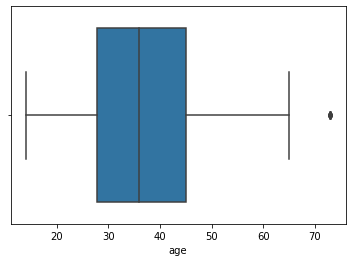

In [11]:
#boxplot
sns.boxplot(lung_cancer_dataset['age'])

<AxesSubplot:xlabel='smoking', ylabel='count'>

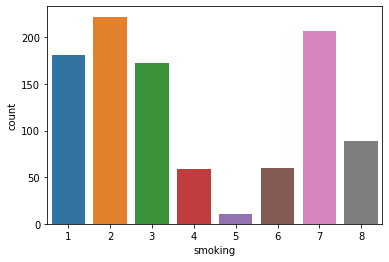

In [12]:
#countplot
sns.countplot(x="smoking",data=lung_cancer_dataset)

<AxesSubplot:xlabel='chest_pain'>

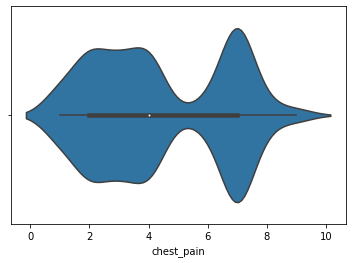

In [13]:
#violin plot
sns.violinplot(x="chest_pain",data=lung_cancer_dataset,kde='True')

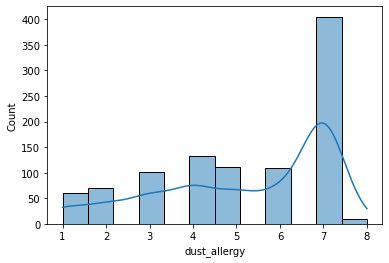

In [14]:
#hist plot
sns.histplot(x = lung_cancer_dataset['dust_allergy'],data=lung_cancer_dataset,kde=True)
plt.show()

<AxesSubplot:xlabel='gender', ylabel='count'>

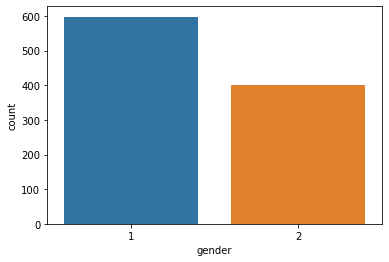

In [15]:
sns.countplot(data=lung_cancer_dataset,x = lung_cancer_dataset['gender'])

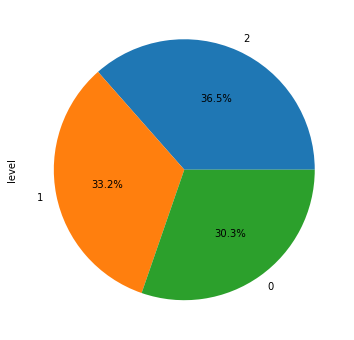

In [16]:
# Pie Chart

lung_cancer_dataset['level'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.show()

Smoking VS Cancer Level


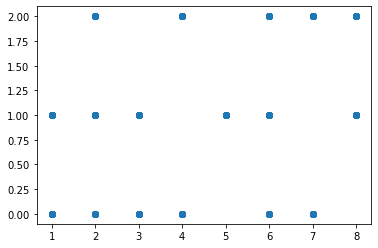

Air Polution VS Cancer Level


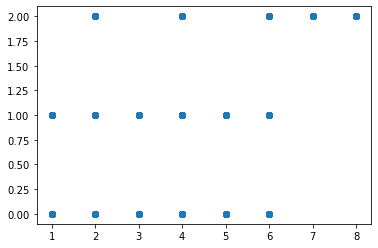

In [17]:
# Scatter Plot

print('Smoking VS Cancer Level')
plt.scatter(lung_cancer_dataset['smoking'], lung_cancer_dataset['level'])
plt.show()

print('Air Polution VS Cancer Level')
plt.scatter(lung_cancer_dataset['air_pollution'], lung_cancer_dataset['level'])
plt.show()


<AxesSubplot:xlabel='age', ylabel='smoking'>

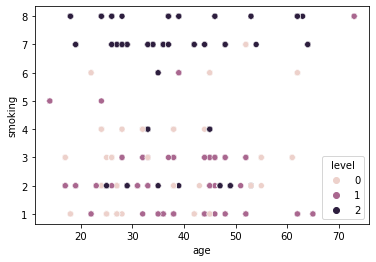

In [18]:
sns.scatterplot(data=lung_cancer_dataset,
          x='age',
           y='smoking',
           hue='level')

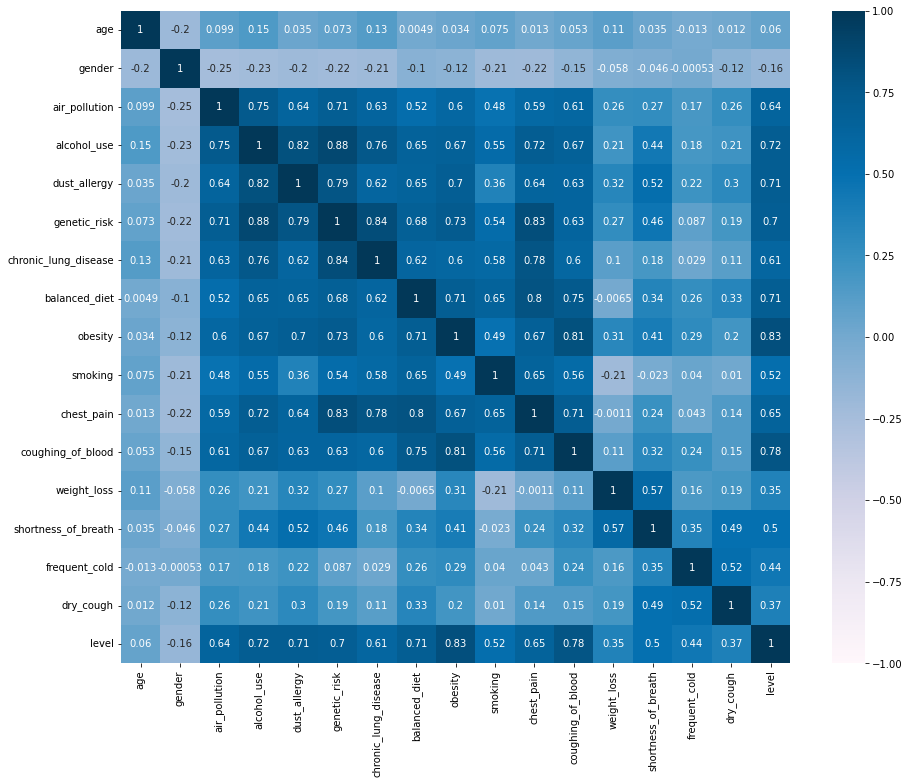

In [19]:
# Heatmap

plt.figure(figsize=(15,12))
sns.heatmap(lung_cancer_dataset.corr(), annot=True, cmap=plt.cm.PuBu,vmin=-1,vmax=1)
plt.show()


# **Setting Target**

In [20]:
# Setting Target

X = lung_cancer_dataset.drop(columns='level')
y = lung_cancer_dataset.level

display(X.head(), y[:10])


,age,gender,air_pollution,alcohol_use,dust_allergy,genetic_risk,chronic_lung_disease,balanced_diet,obesity,smoking,chest_pain,coughing_of_blood,weight_loss,shortness_of_breath,frequent_cold,dry_cough
index,,,,,,,,,,,,,,,,
0,33,1,2,4,5,3,2,2,4,3,2,4,4,2,2,3
1,17,1,3,1,5,4,2,2,2,2,2,3,3,7,1,7
2,35,1,4,5,6,5,4,6,7,2,4,8,7,9,6,7
3,37,1,7,7,7,6,7,7,7,7,7,8,2,3,6,7
4,46,1,6,8,7,7,6,7,7,8,7,9,2,4,4,2


index
0    0
1    1
2    2
3    2
4    2
5    2
6    0
7    0
8    1
9    1
Name: level, dtype: int64

In [21]:
lung_cancer_dataset.columns

Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'genetic_risk', 'chronic_lung_disease', 'balanced_diet', 'obesity',
       'smoking', 'chest_pain', 'coughing_of_blood', 'weight_loss',
       'shortness_of_breath', 'frequent_cold', 'dry_cough', 'level'],
      dtype='object')

# **Train Test Split**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('\nTrain Shape\n')
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('\n\nTest Shape\n')
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)



Train Shape

X train shape:  (800, 16)
Y train shape:  (800,)


Test Shape

X test shape:  (200, 16)
Y test shape:  (200,)


# **Scaling the Data**

In [23]:
# Data Scaling

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [46]:
X_test_scaled

array([[-0.4281143 , -0.81862454, -0.90901947, ..., -0.5164024 ,
        -0.84476111,  0.56867466],
       [ 0.74854342, -0.81862454,  1.06979842, ..., -0.07597391,
         0.24789675, -0.91321371],
       [ 0.16021456, -0.81862454,  0.08038948, ..., -0.95683088,
         1.88688356,  0.56867466],
       ...,
       [-0.17597336, -0.81862454, -0.90901947, ...,  0.36445457,
        -1.39109005, -0.91321371],
       [-1.68881901, -0.81862454, -0.414315  , ...,  1.24531154,
        -1.39109005,  1.55660025],
       [ 0.07616758,  1.22156123, -0.414315  , ..., -0.5164024 ,
         0.79422569, -1.4071765 ]])

# **Logistic Regression**

In [24]:
# Logistic Regression

LogisticRegression = LogisticRegression(C=24)

LogisticRegression.fit(X_train_scaled, y_train)

y_predict1 = LogisticRegression.predict(X_test_scaled)

C:\Users\vijay\anaconda3\anconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Confusion Matrix**

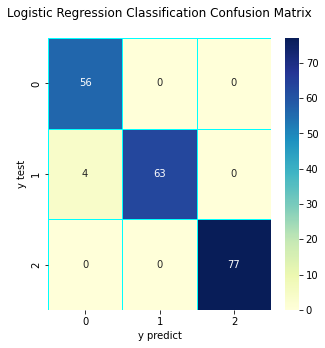

In [25]:
# Confusion Matrix

LogisticRegression_cm = confusion_matrix(y_test, y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(LogisticRegression_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()


**Test Score**

In [26]:
# Test Score

score_LogisticRegression = LogisticRegression.score(X_test_scaled, y_test)
print('Logistic Regression Score = ',score_LogisticRegression)


Logistic Regression Score =  0.98


In [27]:
# Classification Report

print('\nClassification Report for Logistic Regression\n')
print(classification_report(y_test, y_predict1))



Classification Report for Logistic Regression

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        56
           1       1.00      0.94      0.97        67
           2       1.00      1.00      1.00        77

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



# **Gaussian Naive Bayes**

In [28]:
# Gaussian Naive Bayes

GaussianNB = GaussianNB()

GaussianNB.fit(X_train_scaled, y_train)

y_predict2 = GaussianNB.predict(X_test_scaled)

**Confusion Matrix**

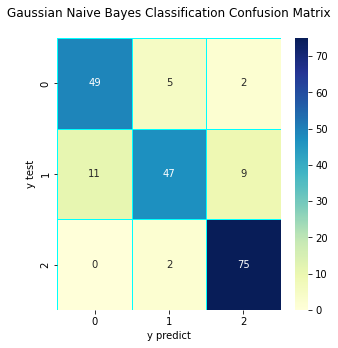

In [29]:
# Confusion Matrix

GaussianNB_cm = confusion_matrix(y_test, y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(GaussianNB_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Gaussian Naive Bayes Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
plt.show()


**Test Score**

In [30]:
# Test Score

score_GaussianNB = GaussianNB.score(X_test_scaled, y_test)
print('Gaussian Naive Bayes Score = ',score_GaussianNB)


Gaussian Naive Bayes Score =  0.855


In [31]:
# Classification Report
print('\nClassification Report for Gaussian Naive Bayes\n')
print(classification_report(y_test, y_predict2))



Classification Report for Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.82      0.88      0.84        56
           1       0.87      0.70      0.78        67
           2       0.87      0.97      0.92        77

    accuracy                           0.85       200
   macro avg       0.85      0.85      0.85       200
weighted avg       0.86      0.85      0.85       200



# **K Nearest Neighbors**

In [32]:
K_Nearest_Neighbors = KNeighborsClassifier(n_neighbors = 1)
 
K_Nearest_Neighbors.fit(X_test_scaled, y_test)
pred = K_Nearest_Neighbors.predict(X_test_scaled)

In [33]:
# Test Score
score_K_Nearest_Neighbors = K_Nearest_Neighbors.score(X_test_scaled, y_test)
print('K_Nearest_Neighbors = ', score_K_Nearest_Neighbors)

K_Nearest_Neighbors =  1.0


In [34]:
print("classification report of KN earest Neighbors")
print(classification_report(y_test, pred))


classification report of KN earest Neighbors
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



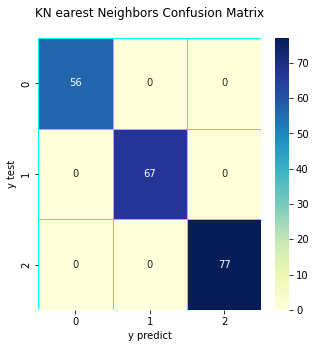

In [35]:
# Confusion Matrix

K_Nearest_Neighbors_cm = confusion_matrix(y_test, pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(K_Nearest_Neighbors_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KN earest Neighbors Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

# **Decision Tree**

In [36]:
# Decision Tree

DecisionTreeClassifier = DecisionTreeClassifier(random_state=9)

DecisionTreeClassifier.fit(X_train_scaled, y_train)

y_predict3 = DecisionTreeClassifier.predict(X_test_scaled)

**Confusion Matrix**

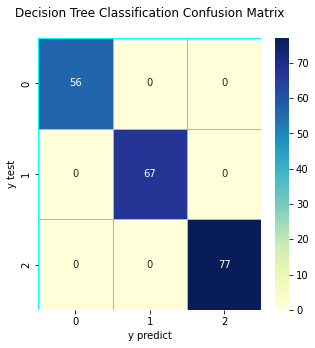

In [37]:
# Confusion Matrix

DecisionTreeClassifier_cm = confusion_matrix(y_test, y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(DecisionTreeClassifier_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix\n')
plt.xlabel('y predict')
plt.ylabel('y test')
print('\n')
plt.show()
print('\n')

**Test Score**

In [38]:
# Test Score
score_DecisionTreeClassifier = DecisionTreeClassifier.score(X_test_scaled, y_test)
print('Decision Tree Score = ', score_DecisionTreeClassifier)

Decision Tree Score =  1.0


In [39]:
# Classification Report
print('Classification Tree for Decision Tree')
print(classification_report(y_test, y_predict3))


Classification Tree for Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        77

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



# **All Test Scores**

In [40]:
# All Test Scores

Testscores = pd.Series([score_LogisticRegression, score_GaussianNB, score_DecisionTreeClassifier,score_K_Nearest_Neighbors], 
                        index=['Logistic Regression Score = ', 'Naive Bayes Score = ', 'Decision Tree Score = ',"K Nearest Neighbors score"]) 
print(Testscores)


Logistic Regression Score =     0.980
Naive Bayes Score =             0.855
Decision Tree Score =           1.000
K Nearest Neighbors score       1.000
dtype: float64


# **All Confusion Matrices**

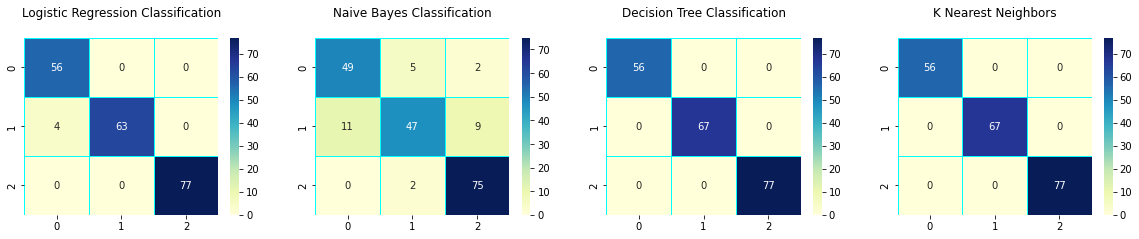

In [41]:
# All Confusion Matrices

fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(4, 4, 1) 
ax1.set_title('Logistic Regression Classification\n') 
ax2 = fig.add_subplot(4, 4, 2)
ax2.set_title('Naive Bayes Classification\n')
ax3 = fig.add_subplot(4, 4, 3)
ax3.set_title('Decision Tree Classification\n')
ax4 = fig.add_subplot(4, 4, 4)
ax4.set_title('K Nearest Neighbors\n')

sns.heatmap(data=LogisticRegression_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=GaussianNB_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)
sns.heatmap(data=DecisionTreeClassifier_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=K_Nearest_Neighbors_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)

plt.show()


# **Comparison**

In [42]:
# Comparison of Algorithms

x=['Logistic Regression', 'G. Naive Bayes', 'Decision Tree',"K Nearest Neighbors",]
y = [score_LogisticRegression, score_GaussianNB, score_DecisionTreeClassifier,score_K_Nearest_Neighbors]

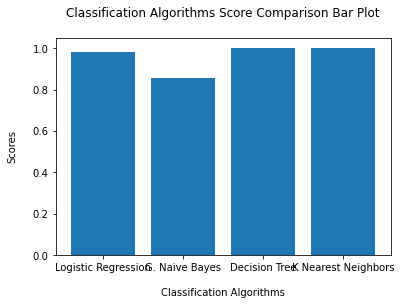

In [43]:
# Bar Plot

plt.bar(x,y)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Bar Plot\n')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


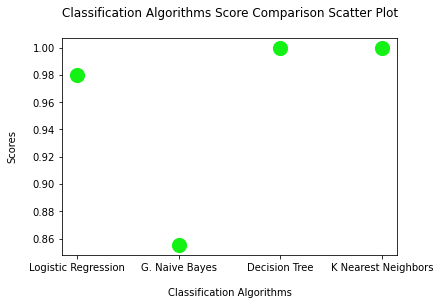

In [47]:
# Scatter Plot

colors = np.random.rand(3)
plt.xlabel('\nClassification Algorithms')
plt.ylabel("Scores\n")
plt.title('Classification Algorithms Score Comparison Scatter Plot\n')
plt.scatter(x, y, s=200, c=colors)
plt.show()

In [45]:
# Compare Scores and Find Out The Best Algorithm

al = False
ln = False
ld = False
nd = False

if score_LogisticRegression == score_GaussianNB  and score_LogisticRegression == score_DecisionTreeClassifier and score_GaussianNB == score_DecisionTreeClassifier  :
    al = True

if score_LogisticRegression == score_GaussianNB:
    ln = True
    
if score_LogisticRegression == score_DecisionTreeClassifier:
    ld = True
    
if score_GaussianNB == score_DecisionTreeClassifier:
    nd = True
      
if al:
    print('\nAll Models Perform The Same\n')
elif ln:
    print('\nLogistic Regression and Gaussian Naive Bayes Performs Better\n')
elif ld:
    print('\nLogistic Regression and Decision Tree Performs Better\n')
elif nd:
    print('\nGaussian Naive Bayes and Decision Tree Performs Better\n')
else:
    if score_LogisticRegression > score_GaussianNB and score_LogisticRegression > score_DecisionTreeClassifier:
        print('\nLogistic Regression Performs Better\n')
    if score_GaussianNB > score_LogisticRegression and score_GaussianNB > score_DecisionTreeClassifier:
        print('\nGaussian Naive Bayes Performs Better\n')
    if score_DecisionTreeClassifier > score_LogisticRegression and score_DecisionTreeClassifier > score_GaussianNB:
        print('\nDecision Tree Performs Better\n')


Decision Tree Performs Better

